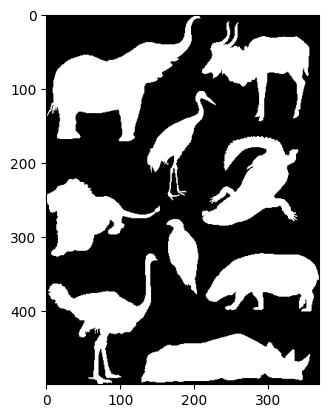

In [56]:
import numpy as np
from PIL import Image
import cv2
from matplotlib import pyplot as plt 

import cv2
import numpy as np

# Cargar imagen
figura = cv2.imread('animales.png', 0)
plt.imshow(figura)
figura = cv2.copyMakeBorder(figura, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)

M, N = figura.shape
lp = 0
lq = 0
lx = 0
etiq = 0


C:\Users\anele\AppData\Local\Temp\ipykernel_16084\443538451.py:18: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 256 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  figura[i, j] = lx
C:\Users\anele\AppData\Local\Temp\ipykernel_16084\443538451.py:18: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 257 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)`
will give the desired result (the cast overflows).
  figura[i, j] = lx
C:\Users\anele\AppData\Local\Temp\ipykernel_16084\443538451.py:18: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 258 to uint8 will fail in the future.
For the old behavior, usually:
  

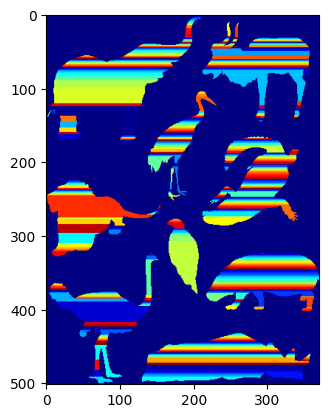

In [51]:
T = np.zeros((0, 2), dtype=int)
for i in range(1, M-1):
    for j in range(1, N-1):
        if figura[i, j] == 255:
            lp = figura[i-1, j]
            lq = figura[i, j-1]
            if lp == 0 and lq == 0:
                etiq += 1
                lx = etiq
            elif lp != lq and lp != 0 and lq != 0:
                # Register equivalence
                T = np.concatenate((T, [[lq, lp]]))
                lx = lq
            elif lq != 0:
                lx = lq
            elif lp != 0:
                lx = lp
            figura[i, j] = lx

cual = cv2.cvtColor(cv2.applyColorMap((figura*10).astype(np.uint8), cv2.COLORMAP_JET), cv2.COLOR_BGR2RGB)
plt.imshow(cual)

In [52]:
# Sacar B0
X1, Y1 = T.shape
B0 = np.zeros((etiq, etiq), dtype=int)
for i in range(X1):
    filaX = T[i, 0]
    columnaX = T[i, 1]
    B0[filaX-1, columnaX-1] = 1

# Sacar BT
BT = B0.T

# Sacar matriz identidad
MI = np.eye(etiq, dtype=int)

# sacar B
B = np.concatenate((B0, BT, MI), axis=1)

# Sacar B+
m, n = B.shape
Bmas = np.zeros((m, n))

for i in range(m):
    for j in range(n):
        Bmas[i, j] = B[i, j]
        
        
for k in range(n):
    for i in range(n):
        for j in range(n):
            Bmas[i, j] = Bmas[i, j] or (Bmas[i, k] and Bmas[k, j])

# Rellenar en 1
nuevo = np.zeros((n, m), dtype=int)
for i in range(n):
    for j in range(m):
        if Bmas[i, j] == 1:
            nuevo[i, j] = j

T = np.concatenate((T, [[lq, lp]]))
# otra cosa
chingon = np.unique(nuevo, axis=0)

# Encontrar los 1's
for i in range(etiq):
    row, col = np.where(chingon == i+1)
    if len(row) > 0:
        figura[figura == i+1] = row[0]+1

figura2 = cv2.cvtColor(cv2.applyColorMap((figura*10).astype(np.uint8), cv2.COLORMAP_JET), cv2.COLOR_BGR2RGB)
plt.imshow(figura2)


IndexError: index 624 is out of bounds for axis 0 with size 624